# Exploration of Distributions and Geographic Patterns 

This notebook explores geographic patterns of the orbiting satellites and their dStec/dt values over time, the tracked in [this issue](https://github.com/vc1492a/sTEC-d-dt-Anomaly-Detection/issues/3). Some of this notebook also pertains to issue [8](https://github.com/vc1492a/sTEC-d-dt-Anomaly-Detection/issues/8), where we want to examine distributions across the data more closely. 

This notebook exists as part of a collection of exploratory analysis and investigation of the data prior to modeling taking place and for contextual understanding of the events taking place and the effect on the data. 

In [1]:
import sys; sys.executable

'/Users/vconstan/Files/Projects/tsunami/venv/bin/python'

## Imports

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import plotly.express as px
import probscale
# read mapbox access token 
#px.set_mapbox_access_token(open("../.mapbox_token").read())
import seaborn as sns
from src import data

## Read Data 

Let's select a particular day, location, and year of data to load for further exploration. We define those variables first below. 

In [2]:
# year = 2015
# doy = 259 # 259 is the day of the earthquake
# location = "chile" # can be chile, hawaii

In [3]:
year = 2012
doy = 302 # 302 is the day of the earthquake
location = "hawaii" # can be chile, hawaii

In [4]:
# read in the data 
df = data.read_day(
    location=location,
    year=year,
    day_of_year=doy
)

  1%|          | 8/1597 [00:00<00:22, 69.76it/s]

Reading dataframes...


100%|██████████| 1597/1597 [00:23<00:00, 68.25it/s]


Concatenating dataframes...


In [5]:
df.head()

mles__G30  mles__G30_lon  mles__G30_lat  mles__G30_h_ipp  \
timestamp                                                                       
2012-10-28 00:00:15        NaN            NaN            NaN              NaN   
2012-10-28 00:00:30   0.007485    -157.084116      18.083569    350022.032541   
2012-10-28 00:00:45        NaN            NaN            NaN              NaN   
2012-10-28 00:01:00   0.007452    -157.084745      18.066226    349993.349675   
2012-10-28 00:01:15        NaN            NaN            NaN              NaN   

                     mles__G30_ele  mles__G30_azi  pgf4__G28  pgf4__G28_lon  \
timestamp                                                                     
2012-10-28 00:00:15            NaN            NaN        NaN            NaN   
2012-10-28 00:00:30      55.567099     226.815319        NaN            NaN   
2012-10-28 00:00:45            NaN            NaN        NaN            NaN   
2012-10-28 00:01:00      55.395757     226.471406        NaN            NaN   
2012-10-28 00:01:15            NaN            NaN        NaN            NaN   

                     pgf4__G28_lat  pgf4__G28_h_ipp  ...  kaep__G03_lat  \
timestamp                                            ...                  
2012-10-28 00:00:15            NaN              NaN  ...            NaN   
2012-10-28 00:00:30            NaN              NaN  ...            NaN   
2012-10-28 00:00:45            NaN              NaN  ...            NaN   
2012-10-28 00:01:00            NaN              NaN  ...            NaN   
2012-10-28 00:01:15            NaN              NaN  ...            NaN   

                     kaep__G03_h_ipp  kaep__G03_ele  kaep__G03_azi  mles__G29  \
timestamp                                                                       
2012-10-28 00:00:15              NaN            NaN            NaN        NaN   
2012-10-28 00:00:30              NaN            NaN            NaN   0.009645   
2012-10-28 00:00:45              NaN            NaN            NaN        NaN   
2012-10-28 00:01:00              NaN            NaN            NaN   0.011897   
2012-10-28 00:01:15              NaN            NaN            NaN        NaN   

                     mles__G29_lon  mles__G29_lat  mles__G29_h_ipp  \
timestamp                                                            
2012-10-28 00:00:15            NaN            NaN              NaN   
2012-10-28 00:00:30    -146.683385      15.679230    349986.270917   
2012-10-28 00:00:45            NaN            NaN              NaN   
2012-10-28 00:01:00    -146.647307      15.628373    350017.320874   
2012-10-28 00:01:15            NaN            NaN              NaN   

                     mles__G29_ele  mles__G29_azi  
timestamp                                          
2012-10-28 00:00:15            NaN            NaN  
2012-10-28 00:00:30      13.435877     112.603594  
2012-10-28 00:00:45            NaN            NaN  
2012-10-28 00:01:00      13.313939     112.794484  
2012-10-28 00:01:15            NaN            NaN  

[5 rows x 9582 columns]

In [6]:
df.columns.values

array(['mles__G30', 'mles__G30_lon', 'mles__G30_lat', ...,
       'mles__G29_h_ipp', 'mles__G29_ele', 'mles__G29_azi'], dtype=object)

In [7]:
df[df.columns.values[5]].describe()

count    995.000000
mean     211.366621
std       88.575402
min       58.794698
25%      111.889692
50%      207.941760
75%      307.380441
max      323.975317
Name: mles__G30_azi, dtype: float64

We may want to create a dataframe where the `dStec/dt` values are normalized on a scale from `[0,1]` for each respective satellite, ground station combination. 

### Create a Normalized Dataframe

In [8]:
from sklearn.preprocessing import minmax_scale

def normalize(dataframe: 'pd.DataFrame', minimum: int = 0, maximum: int = 1) -> 'pd.DataFrame':
    """
    Normalizes the dStec/dt values on a scale from 0 to 1.
    :param dataframe: a dataframe created by the read_day function that
    contains dStec/dt values.
    :return: a dataframe identical to the input dataframe, but with
    normalized values.
    """

    for col in dataframe.columns.values:        
        if len(col.split("__")[1]) == 3:            
            dataframe[col] = minmax_scale(X=dataframe[col],feature_range=(0,1))
                        
    return dataframe

In [9]:
df_normalized = normalize(df)

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/hamlinliu/opt/anaconda3/envs/sTEC/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: R

In [10]:
df_normalized.head()

mles__G30  mles__G30_lon  mles__G30_lat  mles__G30_h_ipp  \
timestamp                                                                       
2012-10-28 00:00:15        NaN            NaN            NaN              NaN   
2012-10-28 00:00:30   0.699561    -157.084116      18.083569    350022.032541   
2012-10-28 00:00:45        NaN            NaN            NaN              NaN   
2012-10-28 00:01:00   0.698715    -157.084745      18.066226    349993.349675   
2012-10-28 00:01:15        NaN            NaN            NaN              NaN   

                     mles__G30_ele  mles__G30_azi  pgf4__G28  pgf4__G28_lon  \
timestamp                                                                     
2012-10-28 00:00:15            NaN            NaN        NaN            NaN   
2012-10-28 00:00:30      55.567099     226.815319        NaN            NaN   
2012-10-28 00:00:45            NaN            NaN        NaN            NaN   
2012-10-28 00:01:00      55.395757     226.471406        NaN            NaN   
2012-10-28 00:01:15            NaN            NaN        NaN            NaN   

                     pgf4__G28_lat  pgf4__G28_h_ipp  ...  kaep__G03_lat  \
timestamp                                            ...                  
2012-10-28 00:00:15            NaN              NaN  ...            NaN   
2012-10-28 00:00:30            NaN              NaN  ...            NaN   
2012-10-28 00:00:45            NaN              NaN  ...            NaN   
2012-10-28 00:01:00            NaN              NaN  ...            NaN   
2012-10-28 00:01:15            NaN              NaN  ...            NaN   

                     kaep__G03_h_ipp  kaep__G03_ele  kaep__G03_azi  mles__G29  \
timestamp                                                                       
2012-10-28 00:00:15              NaN            NaN            NaN        NaN   
2012-10-28 00:00:30              NaN            NaN            NaN   0.545920   
2012-10-28 00:00:45              NaN            NaN            NaN        NaN   
2012-10-28 00:01:00              NaN            NaN            NaN   0.646378   
2012-10-28 00:01:15              NaN            NaN            NaN        NaN   

                     mles__G29_lon  mles__G29_lat  mles__G29_h_ipp  \
timestamp                                                            
2012-10-28 00:00:15            NaN            NaN              NaN   
2012-10-28 00:00:30    -146.683385      15.679230    349986.270917   
2012-10-28 00:00:45            NaN            NaN              NaN   
2012-10-28 00:01:00    -146.647307      15.628373    350017.320874   
2012-10-28 00:01:15            NaN            NaN              NaN   

                     mles__G29_ele  mles__G29_azi  
timestamp                                          
2012-10-28 00:00:15            NaN            NaN  
2012-10-28 00:00:30      13.435877     112.603594  
2012-10-28 00:00:45            NaN            NaN  
2012-10-28 00:01:00      13.313939     112.794484  
2012-10-28 00:01:15            NaN            NaN  

[5 rows x 9582 columns]

In [11]:
df_normalized["mles__G30"].describe()

count    995.000000
mean       0.560158
std        0.178249
min        0.000000
25%        0.462981
50%        0.549098
75%        0.672454
max        1.000000
Name: mles__G30, dtype: float64

The data contains a Pandas DateTime index to provide indications of the time in which the observation was recorded (the index) and columns which correspond to the `dStec/dt`, `lon`, and `lat` of each cobination of sattelite, ground station readings. This information can be used to not only plot the `dStec/dt` values through time, but according to a specific geographic location (the `lat`, `lon` columns). 

In [12]:
def geographic_dataframe(dataframe: pd.DataFrame, satellites: list = None, ground_stations: list = None) -> 'pd.DataFrame': 
    """
    Constructs a dataframe that can be used for plotting or subsequent analysis which is pivoted 
    so that there are columns for latitude and longitude coordiantes and dStec/dt values. Returns 
    a pandas dataframe. 
    
    :param dataframe: an input pandas dataframe that contains dStec/dt values for pairs of satellite, ground station 
    combinations. 
    :param satellites: a list of satellites to retain in the reformatting. 
    :param ground_stations: a list of ground stations to retain in the reformatting. 
    """
    
    # get lists of all satellites and ground stations 
    # if none, use all satellites    
    # else, filter for the satellites provided in the input list 
    if satellites is None: 
        satellites = list(set([col_name.split("__")[0] for col_name in dataframe.columns.values]))
    
    # if none, use all ground stations 
    # if ground stations specified, then filter the selection of satellites 
    if ground_stations is None: 
        ground_stations = list(set([col_name.split("__")[1] for col_name in dataframe.columns.values]))
    
    # filter the dataframe for those ground stations and satellites 
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(satellites))]
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(ground_stations))]
    
    # melt all of the dStec/dt values from the satellites into single column, same with lat and lon
    value_vars = [col for col in dataframe.columns.values if "lat" not in col and "lon" not in col]
    lat_vars = [col for col in dataframe.columns.values if "lat" in col]
    lon_vars = [col for col in dataframe.columns.values if "lon" in col]

    dataframe_melt = pd.melt(dataframe, id_vars=lon_vars + lat_vars, value_vars=value_vars)
    
    # combine all of the lat, lon columns 
    # TODO: there are implications to this merge operation
    dataframe_melt = dataframe_melt.assign(lat=dataframe_melt[lat_vars].mean(1)).drop(lat_vars, 1)
    dataframe_melt = dataframe_melt.assign(lon=dataframe_melt[lon_vars].mean(1)).drop(lon_vars, 1)

    # recode 0.0 lat, lon values as missing 
    dataframe_melt[["lat", "lon"]] = dataframe_melt[["lat", "lon"]].replace(0.0, np.nan)

    # extract the ground station and satellite from the dataframe and create new columns for each 
    dataframe_melt['satellite'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[1].split("_")[0])
    dataframe_melt['ground_station'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[0])
        
    return dataframe_melt
    

The resulting dataframe becomes very large and thus it can be difficult to visualize all of the data. For now, we'll start with a smaller range of time and select a particular hour to visualize.

In [13]:
HOURS = [9,10]

We're going to use the normalized values for now so that we can draw relative comparisons between the satellites (and to some degree the readings across the ground stations). It is reasonable to suspect that the variations in slant electron content, `dStec/dt`, vary in their behavior depending on the conditions experienced by the satellite (location, time, etc.). 

We are focused on detecting **anomalies**, or _changes_ in the behavior of the slant electron content to support that. As such, it is not so much the raw values which are important to examine but rather the relative changes at various points in time, across satellites and geographic locations. 

In [14]:
df_time_slice = df_normalized[df_normalized.index.hour.isin(HOURS)]

In [15]:
df_time_slice.head()

mles__G30  mles__G30_lon  mles__G30_lat  mles__G30_h_ipp  \
timestamp                                                                       
2012-10-28 09:00:00        NaN            NaN            NaN              NaN   
2012-10-28 09:00:15        NaN            NaN            NaN              NaN   
2012-10-28 09:00:30        NaN            NaN            NaN              NaN   
2012-10-28 09:00:45        NaN            NaN            NaN              NaN   
2012-10-28 09:01:00        NaN            NaN            NaN              NaN   

                     mles__G30_ele  mles__G30_azi  pgf4__G28  pgf4__G28_lon  \
timestamp                                                                     
2012-10-28 09:00:00            NaN            NaN        NaN            NaN   
2012-10-28 09:00:15            NaN            NaN        NaN            NaN   
2012-10-28 09:00:30            NaN            NaN        NaN            NaN   
2012-10-28 09:00:45            NaN            NaN        NaN            NaN   
2012-10-28 09:01:00            NaN            NaN        NaN            NaN   

                     pgf4__G28_lat  pgf4__G28_h_ipp  ...  kaep__G03_lat  \
timestamp                                            ...                  
2012-10-28 09:00:00            NaN              NaN  ...            NaN   
2012-10-28 09:00:15            NaN              NaN  ...            NaN   
2012-10-28 09:00:30            NaN              NaN  ...            NaN   
2012-10-28 09:00:45            NaN              NaN  ...            NaN   
2012-10-28 09:01:00            NaN              NaN  ...            NaN   

                     kaep__G03_h_ipp  kaep__G03_ele  kaep__G03_azi  mles__G29  \
timestamp                                                                       
2012-10-28 09:00:00              NaN            NaN            NaN        NaN   
2012-10-28 09:00:15              NaN            NaN            NaN        NaN   
2012-10-28 09:00:30              NaN            NaN            NaN        NaN   
2012-10-28 09:00:45              NaN            NaN            NaN        NaN   
2012-10-28 09:01:00              NaN            NaN            NaN        NaN   

                     mles__G29_lon  mles__G29_lat  mles__G29_h_ipp  \
timestamp                                                            
2012-10-28 09:00:00            NaN            NaN              NaN   
2012-10-28 09:00:15            NaN            NaN              NaN   
2012-10-28 09:00:30            NaN            NaN              NaN   
2012-10-28 09:00:45            NaN            NaN              NaN   
2012-10-28 09:01:00            NaN            NaN              NaN   

                     mles__G29_ele  mles__G29_azi  
timestamp                                          
2012-10-28 09:00:00            NaN            NaN  
2012-10-28 09:00:15            NaN            NaN  
2012-10-28 09:00:30            NaN            NaN  
2012-10-28 09:00:45            NaN            NaN  
2012-10-28 09:01:00            NaN            NaN  

[5 rows x 9582 columns]

We'll start by reading the same ground stations used in experients from [Real-Time Detection of Tsunami Ionospheric Disturbances with a 
Stand-Alone GNSS Receiver: A Preliminary Feasibility Demonstration](https://www.nature.com/articles/srep46607.pdf).

In [16]:
geo_df = geographic_dataframe(
    dataframe=df_time_slice,
#     ground_stations=["mlpr", "kosm"],
    satellites=["G04", "G07", "G08", "G10", "G13", "G20", "G23"]
)

In [17]:
geo_df["value"].describe()

count     386960.0
unique    384949.0
top            1.0
freq          34.0
Name: value, dtype: float64

In [18]:
geo_df.sample(frac=1.).head()

variable     value        lat         lon satellite  \
23153         pmau__G07       NaN  19.958988 -154.696356       G07   
234604        pgf5__G10  0.605232  18.711576 -153.134191       G10   
347505    mmau__G20_azi       NaN  18.992253 -153.571707       G20   
384896  okit__G10_h_ipp    350017  19.194702 -153.262443       G10   
323536    ahup__G08_ele   53.9748  20.238635 -155.104187       G08   

       ground_station  
23153            pmau  
234604           pgf5  
347505           mmau  
384896           okit  
323536           ahup

In [19]:
geo_df.shape

(725760, 6)

There's some empty values in the dataframe because the `dStec/dt` values are not available continuously for each satellite. For the purposes of visualization, these values are not needed. 

In [20]:
geo_df = geo_df[geo_df["value"].notna()]

In [21]:
geo_df.shape

(386960, 6)

## Exploratory Geographic Visualizations

This section includes some geographic visualizations which can be used to explore the data and gain understanding - overall but also in the context of modeling to come. The work provided here, for example, should provide an indication as to whether or not there is a need to rescale or normalize the latitude and longitudinal data if it is to be included in model training. 

### Histogram of Normalized dStec/dt Values

First, we need to drop any rows that are not the `dStec/dt` values. 

In [22]:
geo_df_dstecdt = geo_df[geo_df["variable"].str.contains("ele|ipp|azi") == False].dropna()

In [23]:
geo_df_dstecdt.sample(frac=1).head(10)

variable     value        lat         lon satellite ground_station
163436  pgf4__G10  0.432154  19.120631 -153.728093       G10           pgf4
290378  npit__G13  0.685694  18.882468 -153.093876       G13           npit
722136  alal__G10  0.490076  19.277905 -153.874787       G10           alal
67592   kamo__G23  0.822708  19.183548 -153.372430       G23           kamo
702744  pgf6__G10   0.58655  20.215158 -155.058089       G10           pgf6
295882  ainp__G23    0.8135  19.379124 -153.973254       G23           ainp
576124  pgf4__G20  0.697407  19.831567 -154.472165       G20           pgf4
35024   npoc__G07  0.502042  18.860592 -153.159463       G07           npoc
23254   pmau__G07  0.589293  19.297519 -153.870608       G07           pmau
714272  npoc__G23    0.7193  20.190771 -155.012008       G23           npoc

In [24]:
geo_df_dstecdt.shape

(96740, 6)

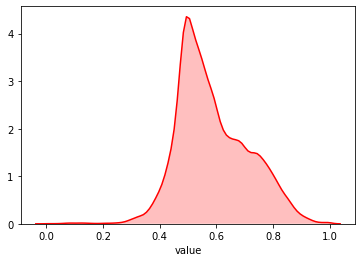

In [25]:
sns.distplot(geo_df_dstecdt["value"], hist=False, color="r", kde_kws={"shade": True})
plt.show()

In [26]:
fig = px.histogram(geo_df_dstecdt, x="value")
fig.show()

If there is a bi-modal or multi-modal distribution shown in the above values, consider filtering the data so that the color scales of the visualizations are interpreted correctly. 

### Distribution of Latitude and Longitude Values

Text(0.5, 1.0, 'Distribution of dStec/dt Values')

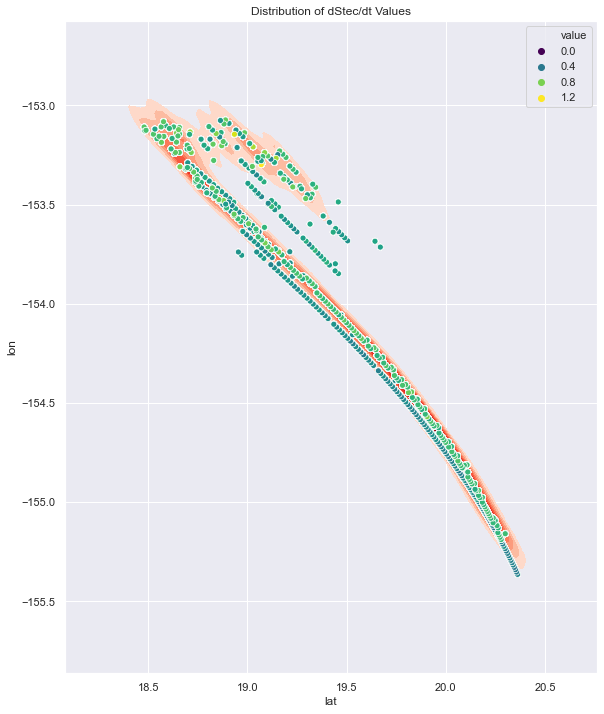

In [27]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")

ax = sns.kdeplot(geo_df_dstecdt["lat"], geo_df_dstecdt["lon"], shade=True, cmap="Reds", shade_lowest=False, cut=5)

ax = sns.scatterplot(x=geo_df_dstecdt["lat"], y=geo_df_dstecdt["lon"],
                hue=geo_df_dstecdt["value"],
                palette="viridis")

ax.set_title("Distribution of dStec/dt Values")


The above plot can provide information as to where most of the data examined originates geographically. 

### dStec/dt Values by Coordinate

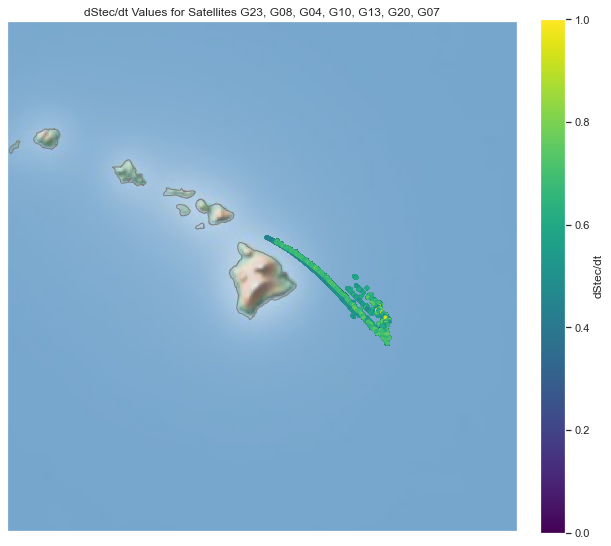

In [28]:
f, ax = plt.subplots(figsize=(10, 10))

ax = Basemap(projection='lcc', resolution='h', 
            lat_0=geo_df_dstecdt["lat"].mean()+0.3, lon_0=geo_df_dstecdt["lon"].mean()-1.5,
            width=1e6, height=1e6)
ax.shadedrelief()
ax.drawcoastlines(color='gray')
ax.drawcountries(color='gray')
ax.drawstates(color='gray')

ax.scatter(geo_df_dstecdt["lon"].values, geo_df_dstecdt["lat"].values, latlon=True,
          c=geo_df_dstecdt["value"].values, s=10,
          cmap='viridis', alpha=1.)

plt.title('dStec/dt Values for Satellites ' + ", ".join(list(set(list(geo_df_dstecdt["satellite"].values)))))

plt.colorbar(label="dStec/dt", fraction=0.046, pad=0.04)

plt.show()

### Distributution of Values Across Ground Stations


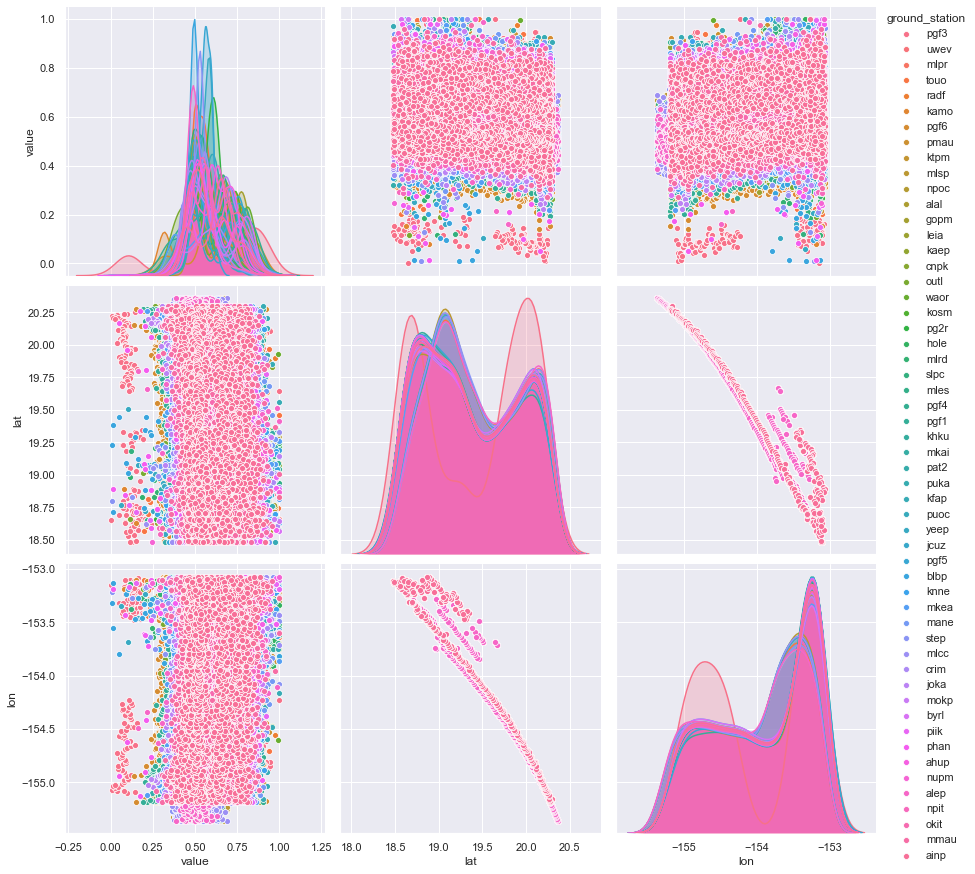

In [29]:
sns.pairplot(geo_df_dstecdt, hue="ground_station", height=4)

Using the pairplot, we are able to look at differences between the ground stations (above) and satellites (below). 

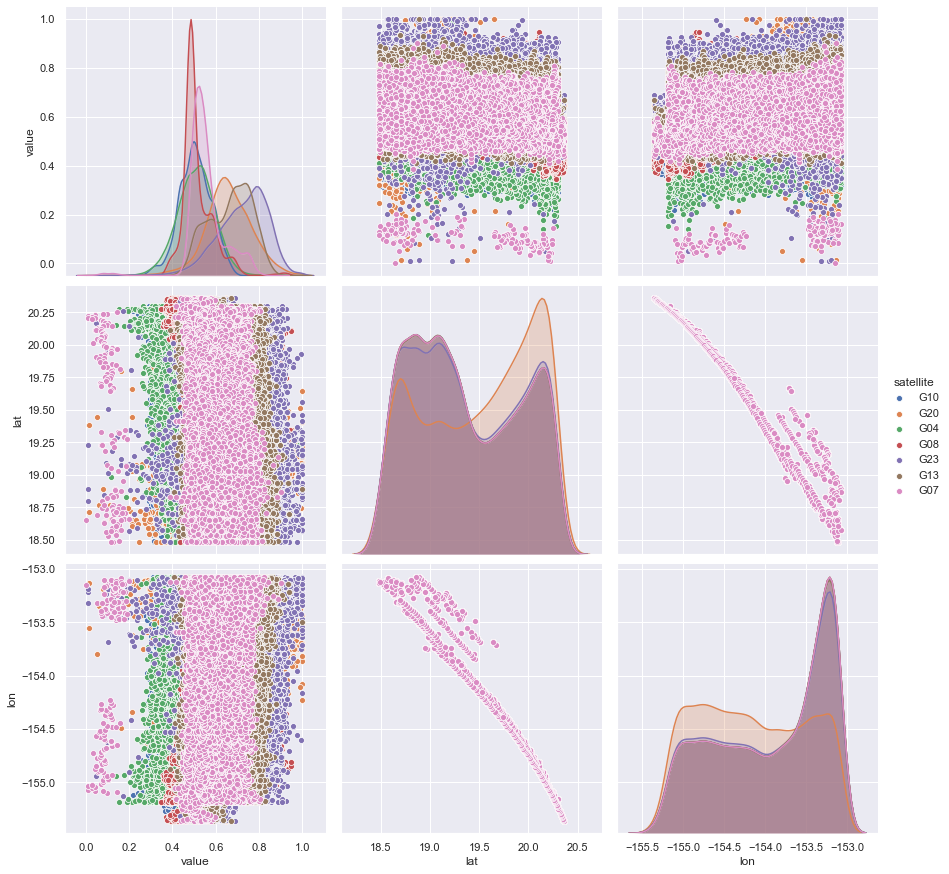

In [30]:
sns.pairplot(geo_df_dstecdt, hue="satellite", height=4)

### Boxplot of dStec/dt Values

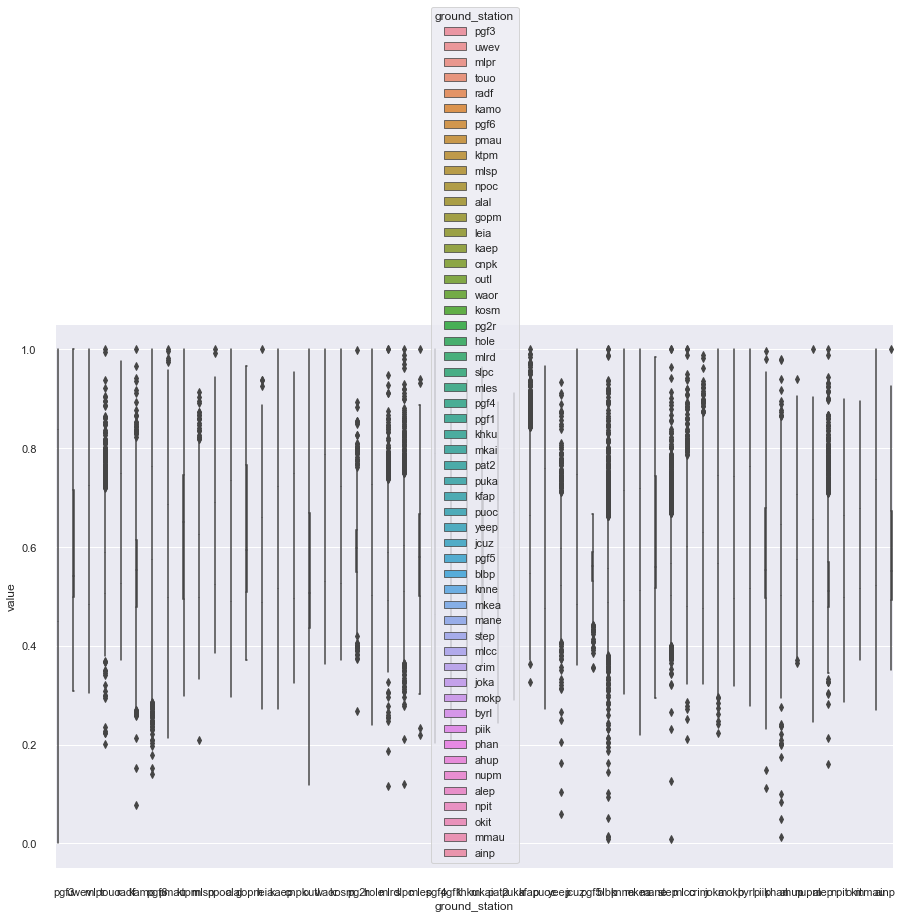

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(x="ground_station", y="value",
            hue="ground_station",
            data=geo_df_dstecdt)
sns.despine(offset=10, trim=True)

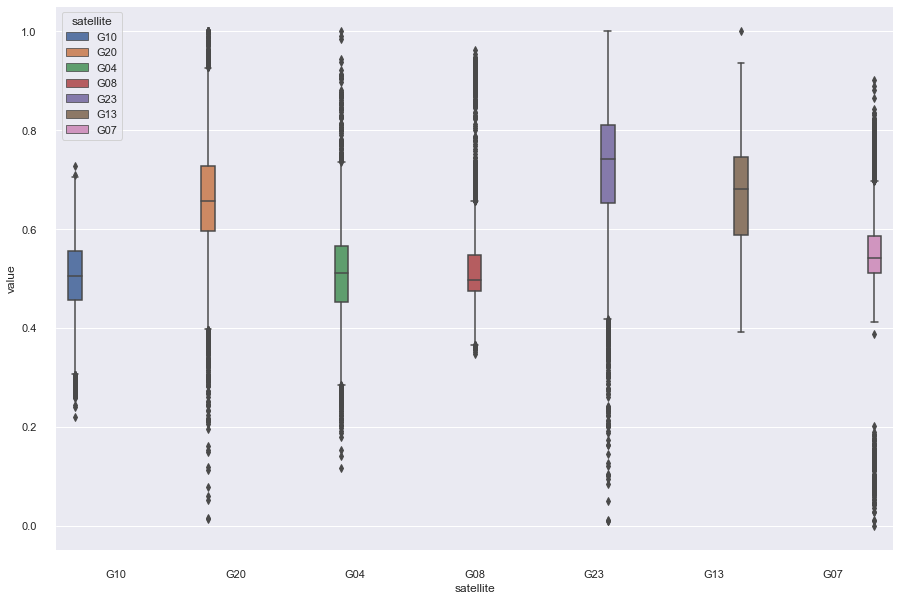

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(x="satellite", y="value",
            hue="satellite",
            data=geo_df_dstecdt)
sns.despine(offset=10, trim=True)

### QQ Plot

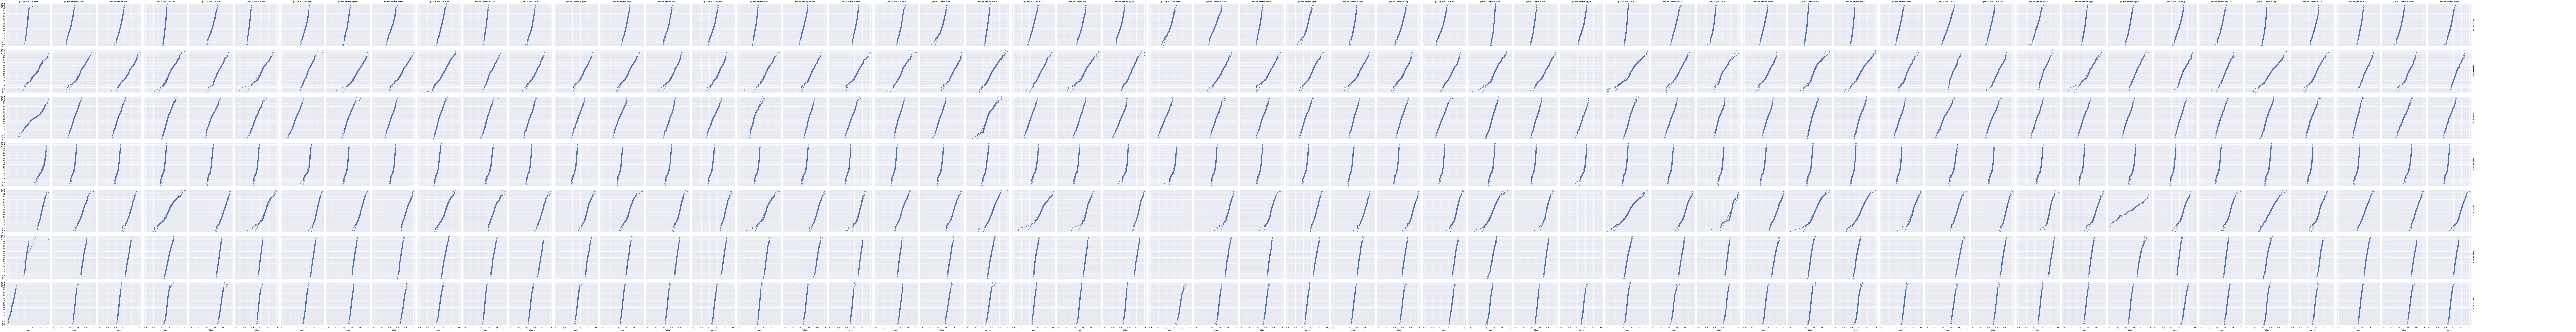

In [33]:
fg = (
    sns.FacetGrid(data=geo_df_dstecdt, row='satellite', col='ground_station', margin_titles=True, height=4)
        .map(probscale.probplot, 'value', probax='y', bestfit=True)
#         .set_ylabels('s')
        .add_legend()
)